In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 1.0,
 'learning_rate': 0.1,
 'length_of_sequences': 50,
 'num_of_hidden_nodes': 2,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 2000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 100,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01,  -9.51056516e-01,  -9.04827052e-01,
        -8.44327926e-01,  -7.70513243e-01,  -6.84547106e-01,
        -5.87785252e-01,  -4.81753674e-01,  -3.68124553e-01,
        -2.48689887e-01,

In [5]:
output = np.load("output.npy")
output

array([ 0.01133673,  0.15492176,  0.30271977,  0.44977117,  0.58921814,
        0.71324146,  0.81498379,  0.89058036,  0.93998843,  0.96619099,
        0.97360379,  0.96670812,  0.94931561,  0.92434651,  0.89387292,
        0.85925227,  0.82126731,  0.78023773,  0.7360968 ,  0.68843406,
        0.63650692,  0.57922614,  0.5151242 ,  0.44232476,  0.35855478,
        0.26129156,  0.14820226,  0.01810195, -0.12748618, -0.28270563,
       -0.43724248, -0.57912713, -0.69913578, -0.79326099, -0.86196303,
       -0.90803504, -0.9348954 , -0.94572079, -0.94314921, -0.92925185,
       -0.90560192, -0.87336379, -0.83337641, -0.78622371, -0.73229378,
       -0.67182904, -0.60497272, -0.53181446, -0.45243973, -0.36698425,
       -0.27569714, -0.17901251, -0.07762931,  0.02740432,  0.13461025,
        0.24202015,  0.34716648,  0.44717056,  0.53897142,  0.61969727,
        0.68710285,  0.73992068,  0.7779848 ,  0.80209059,  0.81367284,
        0.81444532,  0.80610102,  0.7901147 ,  0.76764125,  0.73

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   5.20243287e-01],
       [  2.00000000e+01,   4.92595434e-01],
       [  3.00000000e+01,   5.01385510e-01],
       [  4.00000000e+01,   4.91353065e-01],
       [  5.00000000e+01,   3.59666169e-01],
       [  6.00000000e+01,   2.44753614e-01],
       [  7.00000000e+01,   1.19064234e-01],
       [  8.00000000e+01,   5.42962924e-02],
       [  9.00000000e+01,   4.87622656e-02],
       [  1.00000000e+02,   4.00352776e-02],
       [  1.10000000e+02,   3.68244089e-02],
       [  1.20000000e+02,   2.94172876e-02],
       [  1.30000000e+02,   2.73088589e-02],
       [  1.40000000e+02,   2.90743727e-02],
       [  1.50000000e+02,   2.83052269e-02],
       [  1.60000000e+02,   2.25810166e-02],
       [  1.70000000e+02,   2.19949819e-02],
       [  1.80000000e+02,   2.04222221e-02],
       [  1.90000000e+02,   2.01858040e-02],
       [  2.00000000e+02,   2.14530285e-02],
       [  2.10000000e+02,   1.73267536e-02],
       [  2.20000000e+02,   1.83755904e-02],
       [  

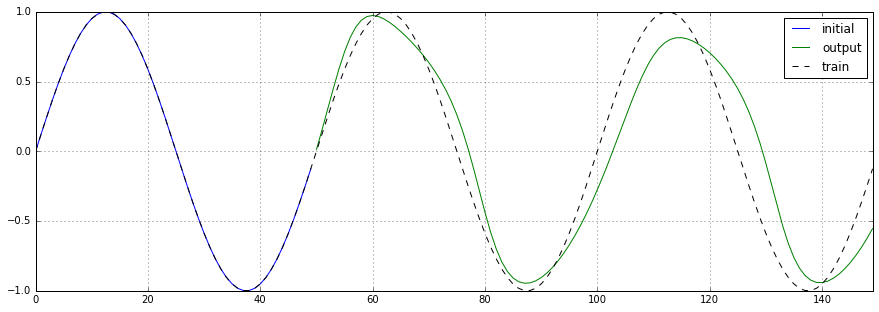

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

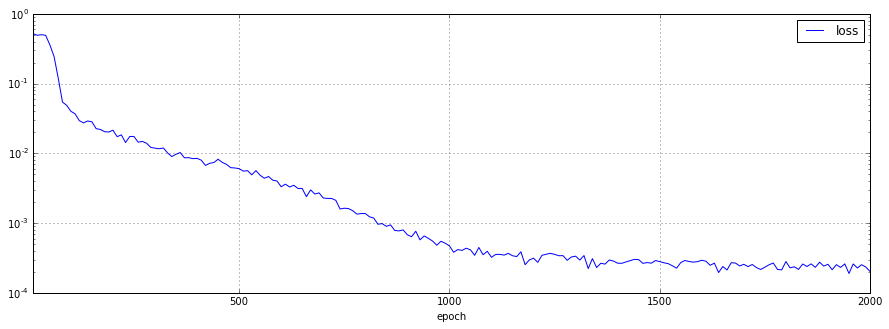

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")